# Analyse de données nutritionnelles : nettoyage des données
Important : le fichier "fr.openfoodfacts.org.products.csv" doit se trouver dans le répertoire courant.

## Initialisation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.options.display.float_format = '{:,.3f}'.format

## Chargement et inspection sommaire

### Chargement du fichier sous forme de DataFrame

In [2]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', delimiter='\t')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(data.info(memory_usage='deep')) # infos sur les données chargées

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 1.7 GB
None


### Liste des attributs

In [4]:
print(', '.join(data.columns.tolist()))

code, url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, generic_name, quantity, packaging, packaging_tags, brands, brands_tags, categories, categories_tags, categories_fr, origins, origins_tags, manufacturing_places, manufacturing_places_tags, labels, labels_tags, labels_fr, emb_codes, emb_codes_tags, first_packaging_code_geo, cities, cities_tags, purchase_places, stores, countries, countries_tags, countries_fr, ingredients_text, allergens, allergens_fr, traces, traces_tags, traces_fr, serving_size, no_nutriments, additives_n, additives, additives_tags, additives_fr, ingredients_from_palm_oil_n, ingredients_from_palm_oil, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_tags, nutrition_grade_uk, nutrition_grade_fr, pnns_groups_1, pnns_groups_2, states, states_tags, states_fr, main_category, main_category_fr, image_url, image_small_url, ene

### Suppressions des colonnes de données d'audit

In [5]:
columns_to_delete = ['created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime']
data.drop(columns=columns_to_delete,inplace=True,errors='ignore')
print(f"{len(columns_to_delete)} colonnes effacées.")

4 colonnes effacées.


### Examen des colonnes avec valeurs manquantes

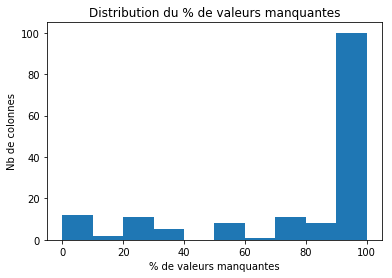

In [6]:
missing_values = data.isnull().sum(axis=0).to_frame(name='count_missing') # nb de valeurs manquantes par colonn
missing_values.sort_values(by=['count_missing'], inplace=True) # tri pour l'affichage
missing_values['percent_missing'] = missing_values['count_missing'] / len(data) * 100 # calcul du %
fig, axes = plt.subplots()
axes.hist(missing_values['percent_missing'], bins=10);
axes.set_title('Distribution du % de valeurs manquantes');
axes.set_xlabel('% de valeurs manquantes');
axes.set_ylabel('Nb de colonnes');

In [7]:
print(f"Colonnes ne contenant aucune valeur :")
print(missing_values[missing_values['count_missing'] == len(data)])

Colonnes ne contenant aucune valeur :
                                       count_missing  percent_missing
ingredients_from_palm_oil                     320772          100.000
chlorophyl_100g                               320772          100.000
lignoceric-acid_100g                          320772          100.000
cerotic-acid_100g                             320772          100.000
melissic-acid_100g                            320772          100.000
glycemic-index_100g                           320772          100.000
elaidic-acid_100g                             320772          100.000
mead-acid_100g                                320772          100.000
erucic-acid_100g                              320772          100.000
nervonic-acid_100g                            320772          100.000
caproic-acid_100g                             320772          100.000
butyric-acid_100g                             320772          100.000
nutrition_grade_uk                            320772

In [8]:
columns_to_delete = missing_values[missing_values['count_missing'] == len(data)].index.values
data.drop(columns=columns_to_delete, inplace=True, errors='ignore') 
missing_values.drop(index=columns_to_delete, inplace=True) # ignore colonnes vides dans la suite de l'analyse
print(f"{len(columns_to_delete)} colonnes effacées.")

16 colonnes effacées.


In [9]:
threshold = 20 
print(f"Colonnes avec moins de {threshold}% valeurs manquantes :")
print(missing_values[missing_values['percent_missing'] < threshold])

Colonnes avec moins de 20% valeurs manquantes :
                count_missing  percent_missing
creator                     2            0.001
code                       23            0.007
url                        23            0.007
states                     46            0.014
states_tags                46            0.014
states_fr                  46            0.014
countries_tags            280            0.087
countries                 280            0.087
countries_fr              280            0.087
product_name            17762            5.537
brands                  28412            8.857
brands_tags             28420            8.860
energy_100g             59659           18.599
proteins_100g           60850           18.970


In [10]:
threshold = 99.99
print(f"Colonnes avec plus de {threshold}% valeurs manquantes :")
print(missing_values[missing_values['percent_missing'] > threshold])

Colonnes avec plus de 99.99% valeurs manquantes :
                                  count_missing  percent_missing
taurine_100g                             320743           99.991
casein_100g                              320745           99.992
glucose_100g                             320746           99.992
arachidic-acid_100g                      320748           99.993
gamma-linolenic-acid_100g                320748           99.993
cities                                   320749           99.993
behenic-acid_100g                        320749           99.993
dihomo-gamma-linolenic-acid_100g         320749           99.993
omega-9-fat_100g                         320751           99.993
chromium_100g                            320752           99.994
allergens_fr                             320753           99.994
serum-proteins_100g                      320756           99.995
gondoic-acid_100g                        320758           99.996
oleic-acid_100g                         

### Suppressions des colonnes contenant moins de 100 valeurs
Nous renonçons à exploiter des colonnes qui contiennent trop peu de valeurs. La valeur de seuil retenue est arbitraire, et nous serons peut-être amenés à la modifier. 

In [18]:
columns_to_delete = missing_values[missing_values['count_missing'] > len(data) - 100].index
print(', '.join(columns_to_delete))
data.drop(columns=columns_to_delete, inplace=True, errors='ignore') 
print(f"{len(columns_to_delete)} colonnes effacées.")

bicarbonate_100g, fluoride_100g, docosahexaenoic-acid_100g, caffeine_100g, sucrose_100g, ph_100g, eicosapentaenoic-acid_100g, fructose_100g, silica_100g, beta-carotene_100g, taurine_100g, casein_100g, glucose_100g, arachidic-acid_100g, gamma-linolenic-acid_100g, cities, behenic-acid_100g, dihomo-gamma-linolenic-acid_100g, omega-9-fat_100g, chromium_100g, allergens_fr, serum-proteins_100g, gondoic-acid_100g, oleic-acid_100g, maltodextrins_100g, molybdenum_100g, nucleotides_100g, arachidonic-acid_100g, maltose_100g, lauric-acid_100g, capric-acid_100g, caprylic-acid_100g, myristic-acid_100g, palmitic-acid_100g, stearic-acid_100g, montanic-acid_100g
36 colonnes effacées.


### Liste des colonnes normalisées (avec le suffixe '_tags')

In [19]:
tags_cols = [col for col in data.columns if '_tags' in col] # list de colonnes terminant par '_tags'
print(', '.join(tags_cols))
print(f"({len(tags_cols)} colonnes trouvées)")

packaging_tags, brands_tags, categories_tags, origins_tags, manufacturing_places_tags, labels_tags, emb_codes_tags, cities_tags, countries_tags, traces_tags, additives_tags, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_tags, states_tags
(14 colonnes trouvées)


In [20]:
raw_cols = [col[:-5] for col in tags_cols if col[:-5] in data.columns]
for col in raw_cols:
    s = data.groupby([col, col+'_tags']).size().sort_values(ascending=False)
    print(f"Valeur la plus courante pour {col}: {s.index[0]} {s[0]}")

Valeur la plus courante pour packaging: ('Carton', 'carton') 2153
Valeur la plus courante pour brands: ('Carrefour', 'carrefour') 2978
Valeur la plus courante pour categories: ('Snacks sucrés,Biscuits et gâteaux,Biscuits', 'en:sugary-snacks,en:biscuits-and-cakes,en:biscuits') 293
Valeur la plus courante pour origins: ('France', 'france') 5171
Valeur la plus courante pour manufacturing_places: ('France', 'france') 9371
Valeur la plus courante pour labels: ('Organic, EU Organic, fr:AB Agriculture Biologique', 'en:organic,en:eu-organic,fr:ab-agriculture-biologique') 3220
Valeur la plus courante pour emb_codes: ('EMB 56251E', 'emb-56251e') 218
Valeur la plus courante pour countries: ('US', 'en:united-states') 169928
Valeur la plus courante pour traces: ('Fruits à coque', 'en:nuts') 1240
Valeur la plus courante pour additives: (' [ semolina -> en:semolina  ]  [ wheat -> en:wheat  ]  [ durum-flour -> en:durum-flour  ]  [ flour -> en:flour  ]  [ wheat -> en:wheat  ]  [ niacin -> en:e375  -> e

### Nous décidons de ne conserver que la version normalisée de chaque colonne

In [22]:
data.drop(columns=raw_cols, inplace=True, errors='ignore') 
print(f"{len(raw_cols)} colonnes effacées.")

11 colonnes effacées.


## Examen d'autres colonnes susceptibles d'être inutiles

In [47]:
def print_col_info(column):
    num_na = data[column].isnull().sum()
    print(f"Nombre d'entrées manquantes : {num_na} ({num_na/len(data)*100:0.2f}%)")
    top_vals = data[column][data[column].notnull()].unique()
    num_samples = 10
    print("Exemples de valeurs : " + ' ; '.join(top_vals[:num_samples]))

In [48]:
print_col_info('brands_tags')

Nombre d'entrées manquantes : 28420 (8.86%)
Exemples de valeurs : ferme-t-y-r-nao ; torn-glasser ; grizzlies ; bob-s-red-mill ; unfi ; lundberg ; daddy-s-muesli ; equal-exchange ; napa-valley-naturals ; gardentime


Les valeurs de cet attribut, bien que sans lien direct avec la qualité nutritionnelle du produit, pourraient toutefois y être correlées.

In [49]:
print_col_info('packaging_tags')

Nombre d'entrées manquantes : 241811 (75.38%)
Exemples de valeurs : plastique ; frais ; paper,plastic-film ; frais,plastique ; sachet-plastique ; carton,boite ; frai ; carton ; aluminium ; carton,bouteille,verre


In [27]:
columns_to_delete = ['packaging_tags', 'brands_tags', 'stores']
for col in columns_to_delete:
    print(data[col][data[col].notnull()][:10].values)

['plastique' 'frais' 'frais' 'paper,plastic-film' 'frais'
 'frais,plastique' 'sachet-plastique' 'carton,boite' 'frai' 'frais']
['ferme-t-y-r-nao' 'torn-glasser' 'grizzlies' 'bob-s-red-mill' 'unfi'
 'lundberg' 'daddy-s-muesli' 'equal-exchange' 'napa-valley-naturals'
 'unfi']
['Costco' 'Costco' 'Waitrose' 'Costco' 'Costco' 'Costco' 'Costco'
 'Alice Délice' 'Alice Délice' 'Lidl']


In [ ]:
SIZE = 20
print(f"List des {SIZE} premiers contributeurs :")
data['creator'].value_counts().head(SIZE)

In [ ]:
print(data.info)

In [ ]:
# Pour plus de clarté et une utilisation moindre de mémoire, 
# nous effaçons les colonnes ne contenant pas d'informations 
# de nutrition ou d'identification des produits
columns_to_delete = ['url', 
                     # données d'audit
                     'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime',
                     # colonnes trop lacunaire pour être utiles
                     'generic_name', 'origins', 'origins_tags', 'stores']

count = 0
for col in columns_to_delete:
    if col in data.columns:
        print(f"Deleted column {col} - contained {data[col].isna().sum()} missing values.")
        del data[col]
        count = count + 1
print(f"{count} columns deleted.")

## Sauvegarde de la version finale

In [24]:
print(data.columns)
print(data.head())

Index(['code', 'url', 'creator', 'product_name', 'generic_name', 'quantity',
       'packaging_tags', 'brands_tags', 'categories_tags', 'categories_fr',
       'origins_tags', 'manufacturing_places_tags', 'labels_tags', 'labels_fr',
       'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags',
       'purchase_places', 'stores', 'countries_tags', 'countries_fr',
       'ingredients_text', 'allergens', 'traces_tags', 'traces_fr',
       'serving_size', 'additives_n', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url',
       'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
    

## Analyse statistique multivariée

## Introduction de données synthétiques ("feature engineering")